In [5]:
pip install pymnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 16.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [9]:
from pymnet import MultilayerNetwork

Matplotlib is building the font cache; this may take a moment.


In [10]:
csv_file = 'Assignment_1_Data.csv'
data = pd.read_csv(csv_file)

In [11]:
net = MultilayerNetwork(aspects=1, fullyInterconnected=False)

In [23]:
import pandas as pd

# Step 1: Load the raw student data into a DataFrame
data = {
    "Student Name": [
        f"Student {i}" for i in range(1, 25)
    ],
    "Data Mining or Machine Learning": [
        "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", 
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes"
    ],
    "Python or R Programming": [
        "Yes" for _ in range(24)
    ],
    "Graphs or Statistics": [
        "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", 
        "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No"
    ]
}

df = pd.DataFrame(data)

# Step 2: Generate edge list
edge_list = []
students = df["Student Name"]

for i, student_1 in enumerate(students):
    for j, student_2 in enumerate(students):
        if i < j:  # Avoid self-loops and duplicate edges
            shared_background = (
                (df.loc[i, "Data Mining or Machine Learning"] == "Yes" and df.loc[j, "Data Mining or Machine Learning"] == "Yes") +
                (df.loc[i, "Python or R Programming"] == "Yes" and df.loc[j, "Python or R Programming"] == "Yes") +
                (df.loc[i, "Graphs or Statistics"] == "Yes" and df.loc[j, "Graphs or Statistics"] == "Yes")
            )
            if shared_background > 0:
                edge_list.append((student_1, student_2, shared_background))  # (source, target, weight)

# Step 3: Convert edge list to a DataFrame for better visualization
edge_df = pd.DataFrame(edge_list, columns=["Source", "Target", "Weight"])

# Save the edge list to a CSV file or display it
edge_df.to_csv("student_graph_edgelist.csv", index=False)
print(edge_df)

         Source      Target  Weight
0     Student 1   Student 2       2
1     Student 1   Student 3       1
2     Student 1   Student 4       2
3     Student 1   Student 5       2
4     Student 1   Student 6       1
..          ...         ...     ...
271  Student 21  Student 23       2
272  Student 21  Student 24       1
273  Student 22  Student 23       3
274  Student 22  Student 24       2
275  Student 23  Student 24       2

[276 rows x 3 columns]


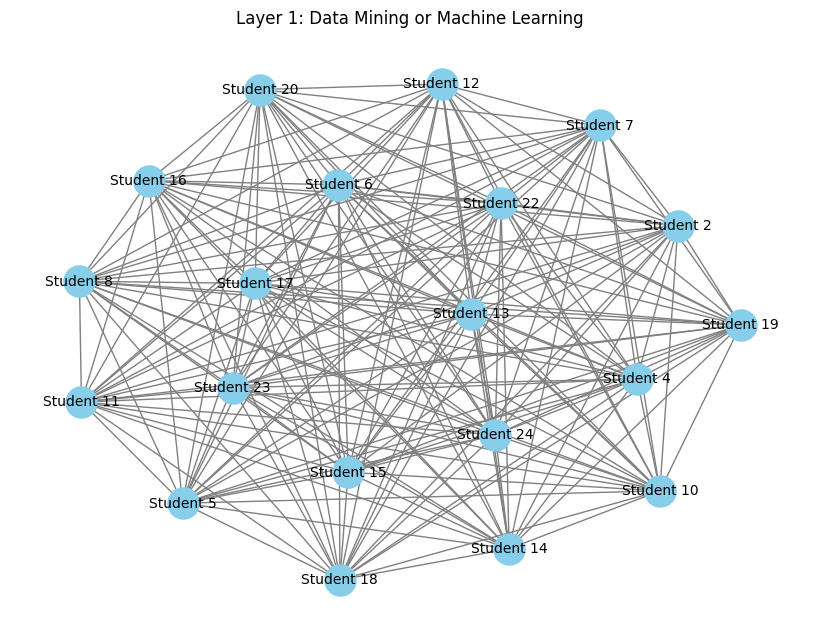

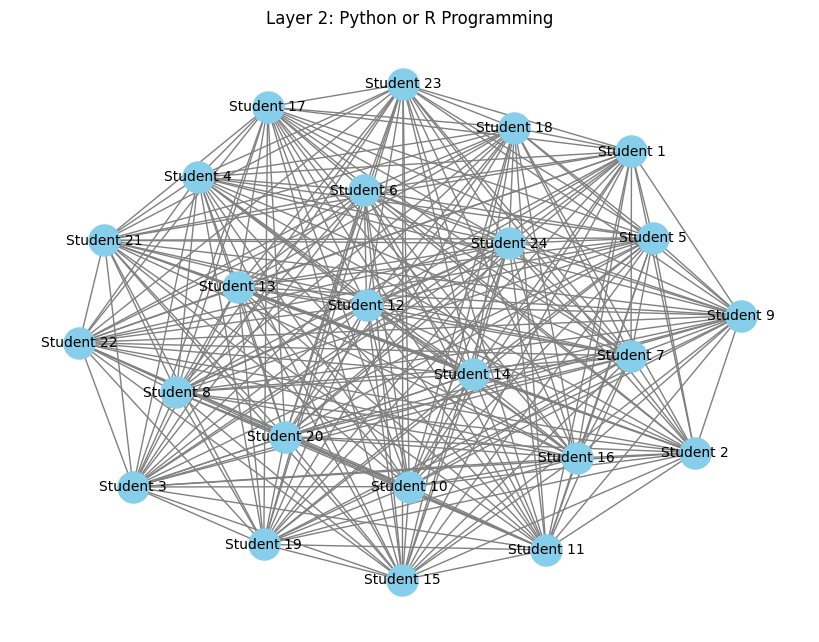

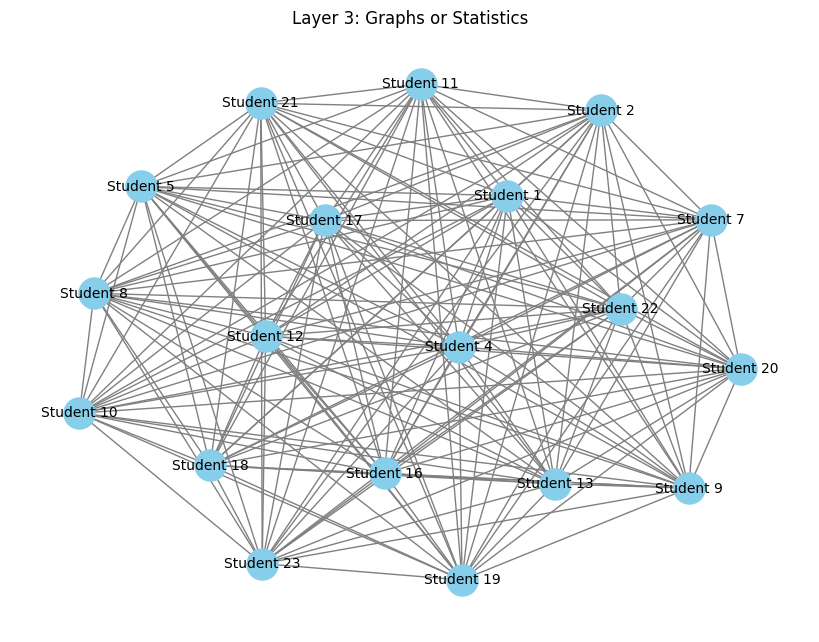

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the data into a DataFrame
data = {
    "Student Name": [
        f"Student {i}" for i in range(1, 25)
    ],
    "Data Mining or Machine Learning": [
        "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", 
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes"
    ],
    "Python or R Programming": [
        "Yes" for _ in range(24)
    ],
    "Graphs or Statistics": [
        "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", 
        "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No"
    ]
}

df = pd.DataFrame(data)

# Step 2: Create Edge Lists
def create_edge_list(df, column):
    edge_list = []
    students = df["Student Name"]
    for i, student_1 in enumerate(students):
        for j, student_2 in enumerate(students):
            if i < j:  # Avoid duplicate edges
                if df.loc[i, column] == "Yes" and df.loc[j, column] == "Yes":
                    edge_list.append((student_1, student_2))  # Edge (student_1, student_2)
    return edge_list

# Create edge lists for each layer
layer_1_edges = create_edge_list(df, "Data Mining or Machine Learning")
layer_2_edges = create_edge_list(df, "Python or R Programming")
layer_3_edges = create_edge_list(df, "Graphs or Statistics")

# Step 3: Visualize the Multilayer Network
def visualize_layer(edge_list, title):
    G = nx.Graph()
    G.add_edges_from(edge_list)
    
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, edge_color="gray")
    plt.title(title)
    plt.show()

# Visualize each layer
visualize_layer(layer_1_edges, "Layer 1: Data Mining or Machine Learning")
visualize_layer(layer_2_edges, "Layer 2: Python or R Programming")
visualize_layer(layer_3_edges, "Layer 3: Graphs or Statistics")

# Step 4: Save Edge Lists to CSV
pd.DataFrame(layer_1_edges, columns=["Source", "Target"]).to_csv("layer_1_edgelist.csv", index=False)
pd.DataFrame(layer_2_edges, columns=["Source", "Target"]).to_csv("layer_2_edgelist.csv", index=False)
pd.DataFrame(layer_3_edges, columns=["Source", "Target"]).to_csv("layer_3_edgelist.csv", index=False)


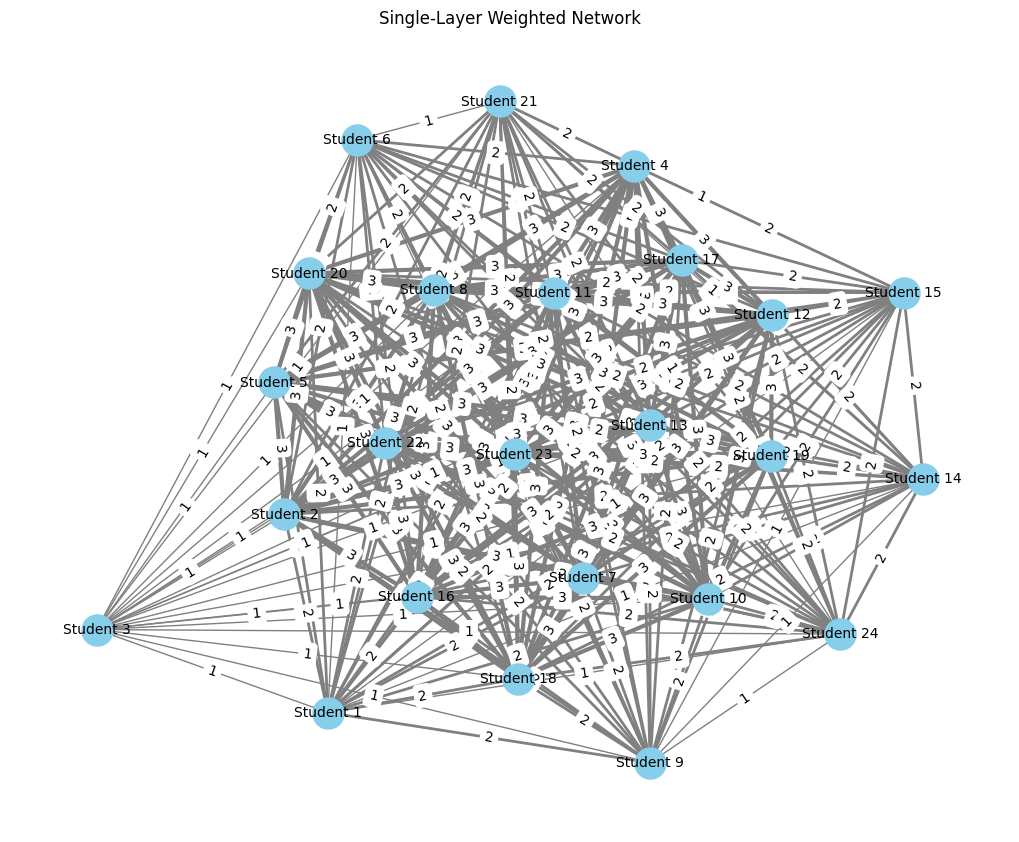

         Source      Target  Weight
0     Student 2   Student 4       3
1     Student 2   Student 5       3
2     Student 2   Student 6       2
3     Student 2   Student 7       3
4     Student 2   Student 8       3
..          ...         ...     ...
271  Student 19  Student 21       2
272  Student 20  Student 21       2
273  Student 21  Student 22       2
274  Student 21  Student 23       2
275  Student 21  Student 24       1

[276 rows x 3 columns]


In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the Data (same as Problem 1)
data = {
    "Student Name": [
        f"Student {i}" for i in range(1, 25)
    ],
    "Data Mining or Machine Learning": [
        "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", 
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes"
    ],
    "Python or R Programming": [
        "Yes" for _ in range(24)
    ],
    "Graphs or Statistics": [
        "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", 
        "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No"
    ]
}

df = pd.DataFrame(data)

# Step 2: Create Edge Lists for Each Layer
def create_edge_list(df, column):
    edge_list = []
    students = df["Student Name"]
    for i, student_1 in enumerate(students):
        for j, student_2 in enumerate(students):
            if i < j:  # Avoid duplicate edges
                if df.loc[i, column] == "Yes" and df.loc[j, column] == "Yes":
                    edge_list.append((student_1, student_2))  # Edge (student_1, student_2)
    return edge_list

# Edge lists for each layer
layer_1_edges = create_edge_list(df, "Data Mining or Machine Learning")
layer_2_edges = create_edge_list(df, "Python or R Programming")
layer_3_edges = create_edge_list(df, "Graphs or Statistics")

# Step 3: Combine Edge Lists into a Weighted Network
from collections import defaultdict

# Dictionary to store weights for each edge
edge_weights = defaultdict(int)

# Add edges from each layer and increment weights
for edge_list in [layer_1_edges, layer_2_edges, layer_3_edges]:
    for edge in edge_list:
        edge_weights[edge] += 1

# Convert to a DataFrame for easier visualization
weighted_edges = [(source, target, weight) for (source, target), weight in edge_weights.items()]
weighted_edge_df = pd.DataFrame(weighted_edges, columns=["Source", "Target", "Weight"])

# Step 4: Visualize the Weighted Network
def visualize_weighted_network(edge_list, title):
    G = nx.Graph()
    G.add_weighted_edges_from(edge_list)  # Add edges with weights
    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Spring layout for visualization
    nx.draw(
        G, pos, with_labels=True, node_size=500, node_color="skyblue", 
        font_size=10, edge_color="gray", width=[d['weight'] for (_, _, d) in G.edges(data=True)]
    )
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize the weighted network
visualize_weighted_network(weighted_edges, "Single-Layer Weighted Network")

# Step 5: Save Weighted Edge List to CSV
weighted_edge_df.to_csv("weighted_network.csv", index=False)
print(weighted_edge_df)


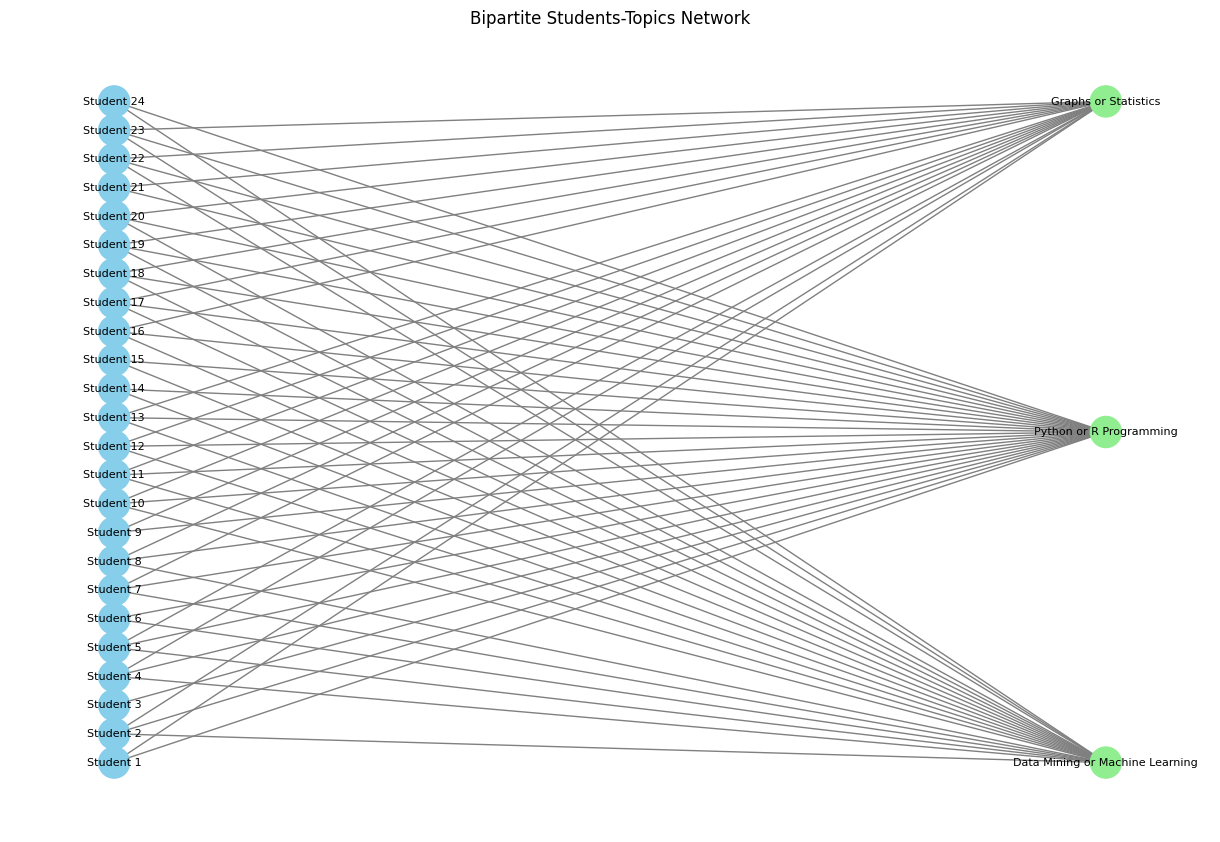

                             source      target
0   Data Mining or Machine Learning   Student 2
1   Data Mining or Machine Learning   Student 4
2   Data Mining or Machine Learning   Student 5
3   Data Mining or Machine Learning   Student 6
4   Data Mining or Machine Learning   Student 7
..                              ...         ...
58             Graphs or Statistics  Student 19
59             Graphs or Statistics  Student 20
60             Graphs or Statistics  Student 21
61             Graphs or Statistics  Student 22
62             Graphs or Statistics  Student 23

[63 rows x 2 columns]


In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = {
    "Student Name": [
        f"Student {i}" for i in range(1, 25)
    ],
    "Data Mining or Machine Learning": [
        "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", 
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes"
    ],
    "Python or R Programming": [
        "Yes" for _ in range(24)
    ],
    "Graphs or Statistics": [
        "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", 
        "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No"
    ]
}

df = pd.DataFrame(data)

# Step 2: Create a Bipartite Graph
B = nx.Graph()

# Add topic nodes (second set of nodes in bipartite graph)
topics = ["Data Mining or Machine Learning", "Python or R Programming", "Graphs or Statistics"]
B.add_nodes_from(topics, bipartite=1)  # Add topic nodes to set 1

# Add student nodes and edges
for i, student in enumerate(df["Student Name"]):
    B.add_node(student, bipartite=0)  # Add student nodes to set 0
    for topic in topics:
        if df.loc[i, topic] == "Yes":
            B.add_edge(student, topic)  # Add an edge if the student took the course

# Step 3: Visualize the Bipartite Network
def visualize_bipartite_graph(B, title):
    plt.figure(figsize=(12, 8))
    
    # Get positions for the bipartite graph
    pos = nx.drawing.layout.bipartite_layout(B, nodes=[n for n, d in B.nodes(data=True) if d["bipartite"] == 0])
    
    # Draw the graph
    nx.draw(
        B, pos, with_labels=True, node_size=500, node_color=["skyblue" if d["bipartite"] == 0 else "lightgreen" for n, d in B.nodes(data=True)],
        font_size=8, edge_color="gray"
    )
    plt.title(title)
    plt.show()

# Visualize the bipartite graph
visualize_bipartite_graph(B, "Bipartite Students-Topics Network")

# Step 4: Save the Bipartite Edges to CSV
bipartite_edges = nx.to_pandas_edgelist(B)
bipartite_edges.to_csv("bipartite_students_topics.csv", index=False)
print(bipartite_edges)


--- Layer 1: Data Mining or Machine Learning ---
Largest Connected Component Size: 20
Diameter of Largest Connected Component: 1
Average Degree: 19.0


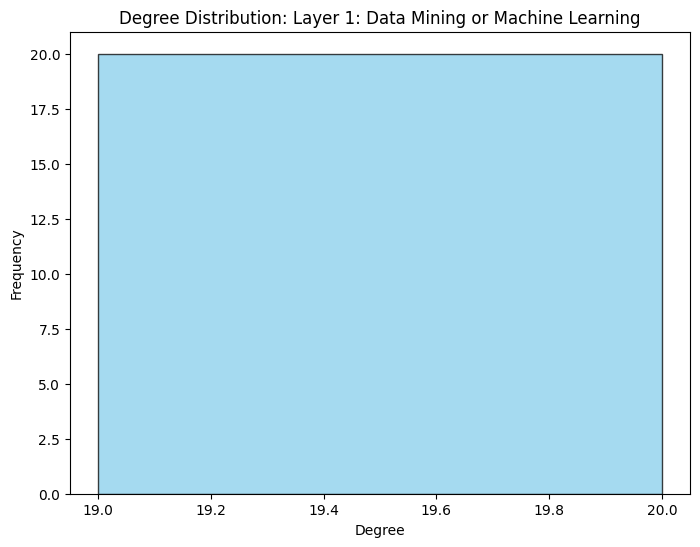

Average Path Length: 1.0
Average Clustering Coefficient: 1.0
--- Layer 2: Python or R Programming ---
Largest Connected Component Size: 24
Diameter of Largest Connected Component: 1
Average Degree: 23.0


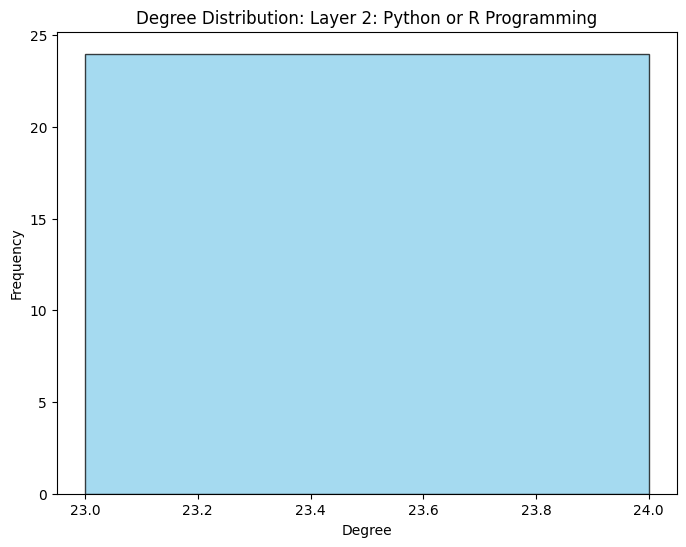

Average Path Length: 1.0
Average Clustering Coefficient: 1.0
--- Layer 3: Graphs or Statistics ---
Largest Connected Component Size: 19
Diameter of Largest Connected Component: 1
Average Degree: 18.0


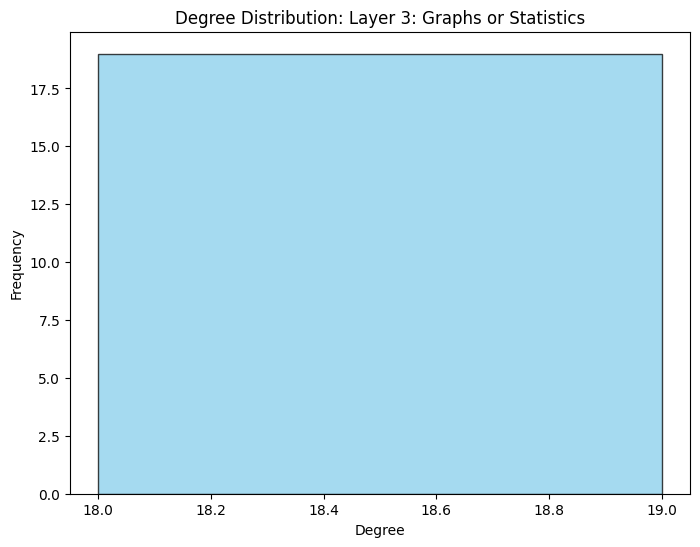

Average Path Length: 1.0
Average Clustering Coefficient: 1.0


In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load Edge Lists for Each Layer
def create_edge_list(df, column):
    edge_list = []
    students = df["Student Name"]
    for i, student_1 in enumerate(students):
        for j, student_2 in enumerate(students):
            if i < j:  # Avoid duplicate edges
                if df.loc[i, column] == "Yes" and df.loc[j, column] == "Yes":
                    edge_list.append((student_1, student_2))  # Edge (student_1, student_2)
    return edge_list

# Student data (same as previous problems)
data = {
    "Student Name": [
        f"Student {i}" for i in range(1, 25)
    ],
    "Data Mining or Machine Learning": [
        "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", 
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes"
    ],
    "Python or R Programming": [
        "Yes" for _ in range(24)
    ],
    "Graphs or Statistics": [
        "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", 
        "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No"
    ]
}

df = pd.DataFrame(data)

# Create edge lists for each layer
layer_1_edges = create_edge_list(df, "Data Mining or Machine Learning")
layer_2_edges = create_edge_list(df, "Python or R Programming")
layer_3_edges = create_edge_list(df, "Graphs or Statistics")

# Step 2: Compute Global Network Properties for Each Layer
def compute_properties(edges, title):
    G = nx.Graph()
    G.add_edges_from(edges)

    print(f"--- {title} ---")

    # 1. Size and Diameter of Largest Connected Component
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_size = len(largest_cc)
    subgraph = G.subgraph(largest_cc)  # Induced subgraph of largest CC
    diameter = nx.diameter(subgraph) if nx.is_connected(subgraph) else "Infinity"
    print(f"Largest Connected Component Size: {largest_cc_size}")
    print(f"Diameter of Largest Connected Component: {diameter}")

    # 2. Degree Distribution
    degrees = [degree for _, degree in G.degree()]
    avg_degree = sum(degrees) / len(degrees)
    print(f"Average Degree: {avg_degree}")

    # Plot Degree Distribution
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), alpha=0.75, color='skyblue', edgecolor='black')
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

    # 3. Average Path Length
    if nx.is_connected(G):
        avg_path_length = nx.average_shortest_path_length(G)
        print(f"Average Path Length: {avg_path_length}")
    else:
        print("Average Path Length: Undefined (Graph is not connected)")

    # 4. Average Clustering Coefficient
    avg_clustering_coeff = nx.average_clustering(G)
    print(f"Average Clustering Coefficient: {avg_clustering_coeff}")

# Compute properties for each layer
compute_properties(layer_1_edges, "Layer 1: Data Mining or Machine Learning")
compute_properties(layer_2_edges, "Layer 2: Python or R Programming")
compute_properties(layer_3_edges, "Layer 3: Graphs or Statistics")
